In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# definition of function
def function(x):
    norm=np.linalg.norm(x)
    if norm<=1/2:
        return 0.25-0.5*norm**2+np.dot([0.2,0.2],x)
    else:
        return 0.5*(norm-1)**2+np.dot([0.2,0.2],x)
    
# calculate the gradient of function
def gradient(x):
    norm=np.linalg.norm(x)
    if norm<=1:
        return -x+[0.3,0.3]
    else:
        return (norm-1)/norm*x+[0.3,0.3]
    
# setup of the experiment
x0=np.array([1,1])
k=0.1
N=100
beta=0.005
x=[]
ite=29
dim=2
I=np.eye(dim)
J=np.zeros([dim,dim])
print(function([0.2,0.2]))
print(function([-1/np.sqrt(2)-0.2,-1/np.sqrt(2)-0.2]))
# gradient(x0)
# np.random.seed(0)
# bm=[]
# for it in range(ite):
#     bm.append(np.random.normal(0,1,[dim]))

0.29000000000000004
-0.322842712474619


In [4]:
x2=list(np.linspace(-2,2,500))
x3=list(np.linspace(-2,2,500))
Z=[]
for i in x2:
    temp=[]
    for j in x3:
        temp.append(function([i,j]))
    Z.append(np.array(temp))
Z=np.array(Z)
X2, X3 = np.meshgrid(x2, x3)
a=[0.2, -1/np.sqrt(2)-0.2]
b=[0.2, -1/np.sqrt(2)-0.2]

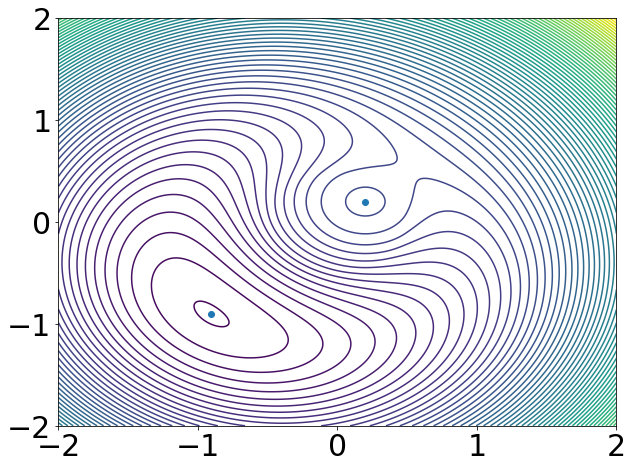

In [5]:
# figure about function in the 2-d contour
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig=plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)#,projection='3d')
ax.contour(X2, X3, Z, 75)
ax.scatter(a,b,cmap='Reds')
plt.tick_params(labelsize=30)
plt.show()

In [6]:
# SGLD method
# we fix the random seed in every sample for all methods
history1=[]
k=1
J=np.zeros([dim,dim])
for n in range(N):
    np.random.seed(n)
    bm=[]
    for it in range(ite):
        bm.append(np.random.normal(0,1,[dim]))
    x1=x0
    f1=[]
    f1.append(function(x1))
    for it in range(ite):
        step=k/(1+0*it)
        grad=gradient(x1)
        x1=x1-step*np.dot((I+J),grad)+np.sqrt(2*step*beta)*bm[it]
        f1.append(function(x1))
    f1=np.array(f1)
    history1.append(f1)
history1=np.transpose(history1)

In [8]:
# preconditioned-SGLD method
# we fix the random seed in every sample for all methods
history4=[]
k=1
a=0.5
lam=0.5
J=np.zeros([dim,dim])
for n in range(N):
    np.random.seed(n)
    bm=[]
    for it in range(ite):
        bm.append(np.random.normal(0,1,[dim]))
    x1=x0
    f4=[]
    v=np.array([0,0])
    f4.append(function(x1))
    for it in range(ite):
        step=k/(1+0*it)
        grad=gradient(x1)
        v=a*v+(1-a)*np.square(grad)
        G=np.zeros([dim,dim])
        G[0,0]=1/(lam+np.sqrt(v)[0])
        G[1,1]=1/(lam+np.sqrt(v)[1])
        x1=x1-step*np.dot(G,grad)+np.sqrt(2*step*beta)*bm[it]
        f4.append(function(x1))
    f4=np.array(f4)
    history4.append(f4)
history4=np.transpose(history4)

In [9]:
# our method with tau=1
k=1
alpha=1
J=np.zeros([dim,dim])
history3=[]
for n in range(N):
    np.random.seed(n)
    bm=[]
    for it in range(ite):
        bm.append(np.random.normal(0,1,[dim]))
    x1=x0
    f3=[]
    f3.append(function(x1))
    J[0,1]=alpha
    J[1,0]=-alpha
    for it in range(ite):
        step=k/(1+0*it)
        grad=gradient(x1)
        x1=x1-step*np.dot((I+J),grad)+np.sqrt(2*step*beta)*bm[it]
        f3.append(function(x1))
    f3=np.array(f3)
    history3.append(f3)
history3=np.transpose(history3)

In [13]:
m1=[]
std1=[]
for i in history1:
    m1.append(np.mean(i))
    std1.append(np.std(i))
# m2=[]
# std2=[]
# for i in history2:
#     m2.append(np.mean(i))
#     std2.append(np.std(i))
m3=[]
std3=[]
for i in history3:
    m3.append(np.mean(i))
    std3.append(np.std(i))
m4=[]
std4=[]
for i in history4:
    m4.append(np.mean(i))
    std4.append(np.std(i))
# m5=[]
# for i in history5:
#     m5.append(np.mean(i))
m1=np.array(m1)
std1=np.array(std1)
# m2=np.array(m2)
# std2=np.array(std2)
m3=np.array(m3)
std3=np.array(std3)
m4=np.array(m4)
std4=np.array(std4)
m1_up=m1+std1
m1_down=m1-std1
m2_up=m2+std2
m2_down=m2-std2
m3_up=m3+std3
m3_down=m3-std3
m4_up=m4+std4
m4_down=m4-std4

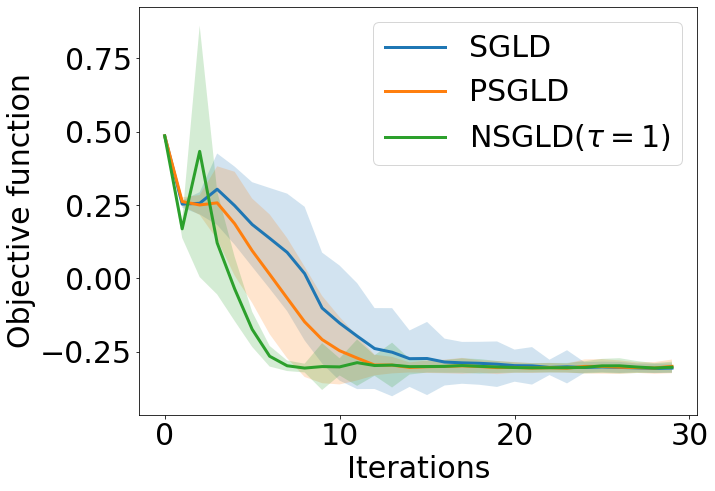

In [15]:
index=[]
for n in range(30):
    index.append(n)
# Figure 1 in the paper
fig=plt.figure(figsize=(10,7.5))
plt.plot(m1[0:30],linewidth=3)
plt.fill_between(index,m1_up,m1_down,alpha=0.2)
# plt.plot(m2[0:30],linewidth=3)
# plt.fill_between(index,m2_up,m2_down,alpha=0.2)
plt.plot(m4[0:30],linewidth=3)
plt.fill_between(index,m4_up,m4_down,alpha=0.2)
plt.plot(m3[0:30],linewidth=3)
plt.fill_between(index,m3_up,m3_down,alpha=0.2)
# plt.plot(m4[0:30])
# plt.plot(m5[0:30])
plt.xlabel('Iterations',fontsize=30)
plt.ylabel('Objective function',fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(['SGLD','PSGLD',r'NSGLD($\tau=1$)'],loc='upper right',fontsize=30)
plt.show()